In this Notebook I will be doing a CFG for Galician. For that I am going to base it on the main sentence constructions that exist in this language. To explain the grammar, throughout this work I will be putting the sentences together with their respective rules.

In any case, to learn more about this language you can check the following links: https://es.wikipedia.org/wiki/Idioma_gallego#Descripción_lingü%C3%ADstica; https://www.edu.xunta.gal/centros/iesfontexeria/aulavirtual/course/view.php?id=118; https://es.wikibooks.org/wiki/Gallego/Gramática 

In [ ]:
!apt-get install -y xvfb 
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    
os.environ['DISPLAY']=':1.0'    
%matplotlib inline


!apt-get update
!apt install ghostscript python3-tk
!pip install svgling
#from ctypes.util import find_library
#find_library("gs")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 780 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 xvfb amd64 2:1.20.13-1ubuntu1~20.04.5 [780 kB]
Fetched 780 kB in 2s (419 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 129502 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.20.13-1ubuntu1~20.04.5_amd64.deb ...
Unpacking xvfb (2:1.20.13-1ubuntu1~20.04.5) ...
Setting up xvfb (2:1.20.13-1ubuntu1~20.04.5) ...
Processing triggers for man-db (2.9.1-1) ...
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://de

In [ ]:
import nltk

from nltk import CFG
from IPython.display import display

grammar_galego = CFG.fromstring("""
   S -> NP VP PUNCT | NP PUNCT | NP VP| S CORD S1 PUNCT| VP| S CONJ S1 PUNCT| S SUB S1 PUNCT| ADVP PUNCT S PUNCT
   PP -> P| P ADV| P Nprop| P Nprop CORD Nprop| P NP
   NP -> Det N |N N | N MOD| Det N MOD| NP CORD NP| Det MOD N MOD| Det N MOD MOD| N MOD| PRON|MOD N|Det MOD N
   VP -> V| V NP | V ADVP| NEG V NP| AUX V | AUX ADVP V| V ADJP| NEG AUX V| V PP
   ADVP -> ADV 
   ADJP -> ADJ| ADJ CORD ADJ| ADJ PUNCT ADJ CORD ADJ| ADVP ADJP
   CONJ -> 'pero'|'porque'|'que'
   SUB -> 'dado'
   SUB -> SUB CONJ
   MOD -> ADJP| PP| PRONrel VP
   Det -> 'a' |'o'|'os'|'as'|'un'|'unha'
   N -> 'rapaza'|'libro'|'rapaz'|'pelota'|'cor'|'culpa'|'tempo'
   Nprop -> 'Cristina'|'Manuel'|'Carlos'
   V -> 'escribe'|'escriben'|'traballa'|'ten'|'xogando'|'pensaba'|'é'|'xoga'|'dorme'|'penso'|'chora'|'fai'|'xogan'
   AUX -> 'estaba'
   P -> 'de'|'en'
   ADV -> 'moi'|'alí'|'tranquilamente'|'sinceramente'
   ADJ -> 'bonito'|'bonita'|'alta'|'rubia'|'laranxa'|'importante'|'guapa'|'bo'
   PRONrel -> 'que'
   PRONrel -> NP PRONrel
   PRON -> 'ela'|'túa'|'el'
   NEG -> 'non' 
   S1 -> NP VP| VP 
   CORD -> 'e'|'ou'
   PUNCT -> '.'|','|'?'
 """)

Although the sentences are already translated throughout the work, I leave here an English translation of the words of my CFG: 

CONJ -> 'but' | 'because' | 'that'

SUB -> 'since'

Det -> 'the' | 'a'

N -> 'girl' | 'book' | 'boy' | 'ball' | 'colour' | 'fault' | 'weather'

V-> 'writes' | 'write' | 'works' | 'has' | 'playing' | 'thought' | 'is' | 'plays' | 'sleeps' | 'think' | 'cries' | 'does' | 'play'

AUX ->'was'

P -> 'of' | 'in'

ADV -> 'really' | 'there' | 'calmly' | 'honestly'

ADJ -> 'nice' | 'tall' | 'blonde' | 'orange' | 'important' | 'pretty' | 'good'

PRONrel -> 'that'

PRON -> 'she' | 'your' | 'he'

NEG -> 'not'

CORD -> 'and' | 'or'

The first formation would be a simple sentence, composed of NP and VP. All sentences have a dot at the end, so they are always followed by PUNCT:
- A rapaza escribe. (The girl writes)

There is the possibility of adding in this sentence a direct complement such as 'a book', so in the VP there would be the verb and an NP formed by a determiner and a noun:
- A rapaza escribe un libro. (The girl writes a book)

Also, this book may have an adjective that modifies it like 'nice'. For that, I create the category of MOD, in which would be the modifiers of the name, in this case simply an ADJP whose nucleus is ADJ:
- A rapaza escribe un libro bonito. (The girl writes a nice book)

This adjective can in turn be mofidified by an adverb such as 'really'. So in the ADJP there would be the possibility of having an ADVP followed by the ADJ.
- A rapaza escribe un libro moi bonito. (The girl writes a really nice book)

If we look at the subject of the sentence, in this case, the girl, it can have a prepositional modifier such as 'from there'. Thus, within the MODs, there would be the possibility of a PP in which the formation P ADV occurs:
- A rapaza de alí escribe un libro moi bonito. (The girl there writes a really nice book)

Also this modifier can be a proper name, so I create the Nprop category for proper names and save them as a possibility in the PP.
- A rapaza de Cristina escribe un libro moi bonito. (Cristina's daughter writes a really nice book) (I translate it as daughter because in Galician the word girl is also used to talk about someone's daughter.)

The modifier can be more complex, with a coordination formation of two proper nouns. Therefore, I include this rule as P Pprop CORD Pprop within PP:
- A rapaza de Cristina e Manuel escribe un libro moi bonito . (Cristina and Manuel's daughter writes a really nice book)

This coordination can also be performed as a single NP, without being in the MOD. I achieve this through the rule: NP CORD NP:
- A rapaza e o rapaz escriben un libro moi bonito. (The girl and the boy write a really nice book)
- A rapaza de Cristina e o rapaz de Manuel escriben un libro moi bonito . (Cristina's daughter and Manuel's son write a really nice book)

sent1:  (S (NP (Det a) (N rapaza)) (VP (V escribe)) (PUNCT .))
sent2:  (S
  (NP (Det a) (N rapaza))
  (VP (V escribe) (NP (Det un) (N libro)))
  (PUNCT .))
sent3:  (S
  (NP (Det a) (N rapaza))
  (VP (V escribe) (NP (Det un) (N libro) (MOD (ADJP (ADJ bonito)))))
  (PUNCT .))
sent4:  (S
  (NP (Det a) (N rapaza))
  (VP
    (V escribe)
    (NP
      (Det un)
      (N libro)
      (MOD (ADJP (ADVP (ADV moi)) (ADJP (ADJ bonito))))))
  (PUNCT .))
sent5:  (S
  (NP (Det a) (N rapaza) (MOD (PP (P de) (ADV alí))))
  (VP
    (V escribe)
    (NP
      (Det un)
      (N libro)
      (MOD (ADJP (ADVP (ADV moi)) (ADJP (ADJ bonito))))))
  (PUNCT .))
sent6:  (S
  (NP (Det a) (N rapaza) (MOD (PP (P de) (Nprop Cristina))))
  (VP
    (V escribe)
    (NP
      (Det un)
      (N libro)
      (MOD (ADJP (ADVP (ADV moi)) (ADJP (ADJ bonito))))))
  (PUNCT .))
sent7:  (S
  (NP
    (Det a)
    (N rapaza)
    (MOD (PP (P de) (Nprop Cristina) (CORD e) (Nprop Manuel))))
  (VP
    (V escribe)
    (NP
      (Det un)
  

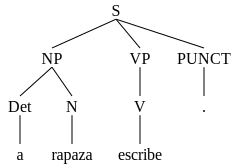

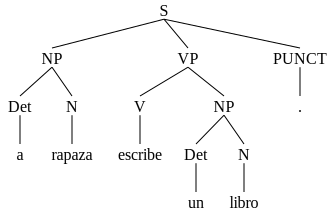

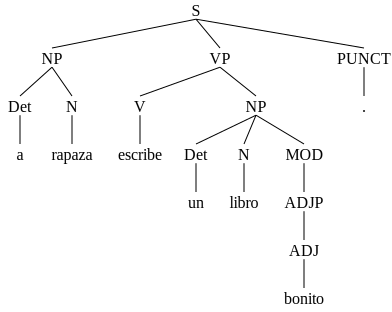

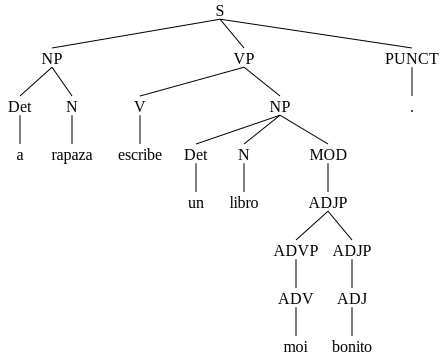

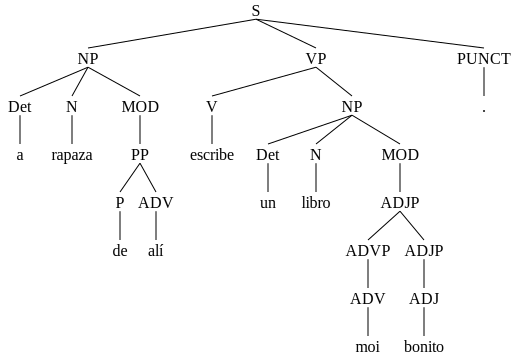

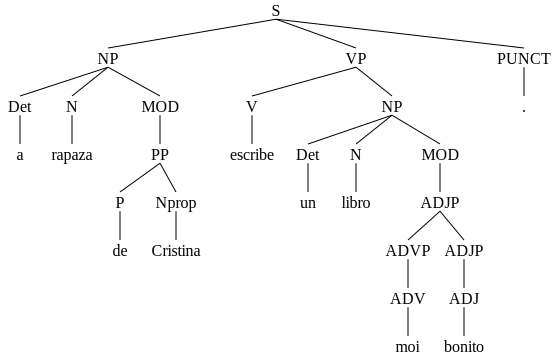

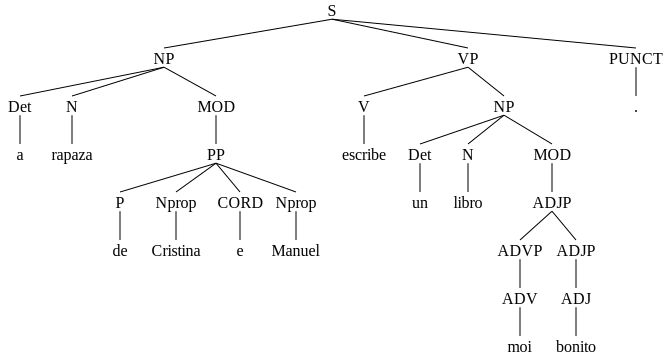

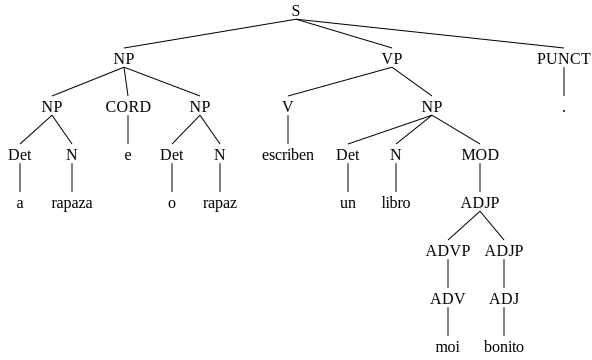

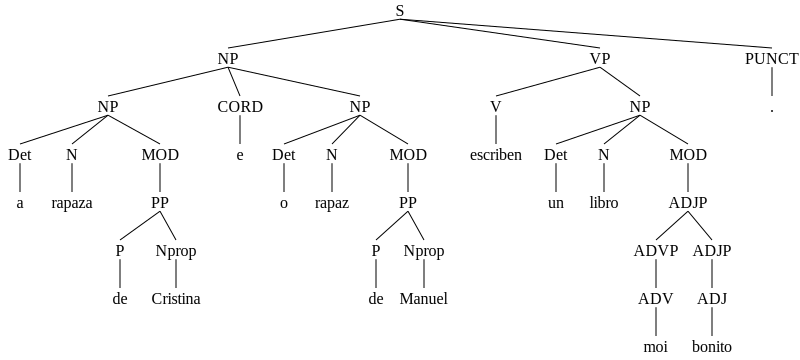

In [ ]:
sent1 = "a rapaza escribe .".split()
sent2="a rapaza escribe un libro .".split()
sent3="a rapaza escribe un libro bonito .".split()
sent4="a rapaza escribe un libro moi bonito .".split()
sent5="a rapaza de alí escribe un libro moi bonito .".split()
sent6="a rapaza de Cristina escribe un libro moi bonito .".split()
sent7="a rapaza de Cristina e Manuel escribe un libro moi bonito .".split()
sent8="a rapaza e o rapaz escriben un libro moi bonito .".split()
sent9="a rapaza de Cristina e o rapaz de Manuel escriben un libro moi bonito .".split()

# Analyzer from the grammar
chart_parser = nltk.ChartParser(grammar_galego)

# View the analysis
for p1 in chart_parser.parse(sent1): print('sent1: ',p1)
for p2 in chart_parser.parse(sent2): print('sent2: ',p2)
for p3 in chart_parser.parse(sent3): print('sent3: ',p3)
for p4 in chart_parser.parse(sent4): print('sent4: ',p4)
for p5 in chart_parser.parse(sent5): print('sent5: ',p5)
for p6 in chart_parser.parse(sent6): print('sent6: ',p6)
for p7 in chart_parser.parse(sent7): print('sent7: ',p7)
for p8 in chart_parser.parse(sent8): print('sent8: ',p8)
for p9 in chart_parser.parse(sent9): print('sent9: ',p9)

#To see the tree
display(p1)
display(p2)
display(p3)
display(p4)
display(p5)
display(p6)
display(p7)
display(p8)
display(p9)

My grammar also includes sentences, i.e. they only have NP, but lack VP. For this I put in the set of S the NP PUNCT rule. And they can be simple phrases such as:
- A rapaza . (the girl)

Or more complex phrases such as:
- A bonita rapaza de alí . (the pretty girl there) 

In addition, in this last sentence an adjective is placed as a noun modifier, a rule I had not put in before (Det MOD N MOD). This indicates that my grammar also covers situations where within an NP there can be a noun with two modifiers, one before and one after. 

Adjectives can also be coordinated through the conjunction 'and', or punctuation through commas:
- A bonita e alta rapaza de alí .(The pretty and tall girl there) --> ADJP -> ADJ CORD ADJ
- A bonita, rubia e alta rapaza de alí. (The pretty, blonde and tall girl there) --> ADJP ->ADJ PUNCT ADJ CORD ADJ

The relative pronoun 'that' can act as a MOD of the noun and at the same time introduce another phrase:
- A rapaza que traballa alí. (The girl that works there)
For that I added the following rules:

VP -> V ADVP

MOD -> PRONrel VP

PRONrel -> NP PRONrel to avoid confusion with a conjunction.

There may be two different modifiers in a row after the name as in:
- A rapaza alta e bonita que traballa alí. (The tall and pretty girl that works there).

To do so, I add the rule: NP -> Det N MOD MOD, so that N has two modifiers. 


sent10:  (S (NP (Det a) (N rapaza)) (PUNCT .))
sent11:  (S
  (NP
    (Det a)
    (MOD (ADJP (ADJ bonita)))
    (N rapaza)
    (MOD (PP (P de) (ADV alí))))
  (PUNCT .))
sent12:  (S
  (NP
    (Det a)
    (MOD (ADJP (ADJ bonita) (CORD e) (ADJ alta)))
    (N rapaza)
    (MOD (PP (P de) (ADV alí))))
  (PUNCT .))
sent13:  (S
  (NP
    (Det a)
    (MOD
      (ADJP (ADJ bonita) (PUNCT ,) (ADJ rubia) (CORD e) (ADJ alta)))
    (N rapaza)
    (MOD (PP (P de) (ADV alí))))
  (PUNCT .))
sent14:  (S
  (NP
    (Det a)
    (N rapaza)
    (MOD (PRONrel que) (VP (V traballa) (ADVP (ADV alí)))))
  (PUNCT .))
sent15:  (S
  (NP
    (Det a)
    (N rapaza)
    (MOD (ADJP (ADJ alta) (CORD e) (ADJ bonita)))
    (MOD (PRONrel que) (VP (V traballa) (ADVP (ADV alí)))))
  (PUNCT .))


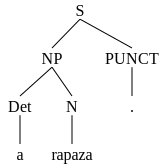

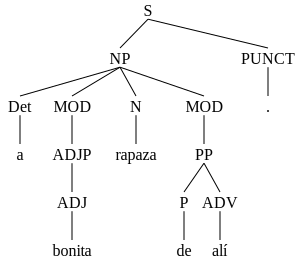

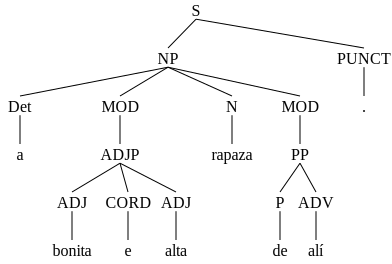

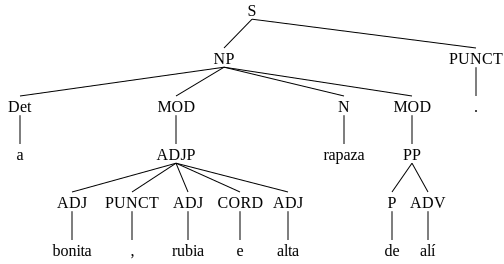

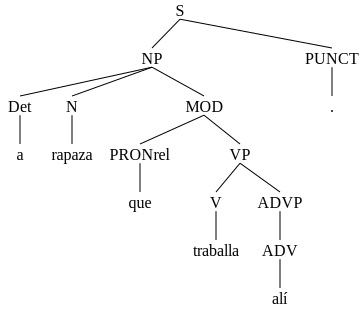

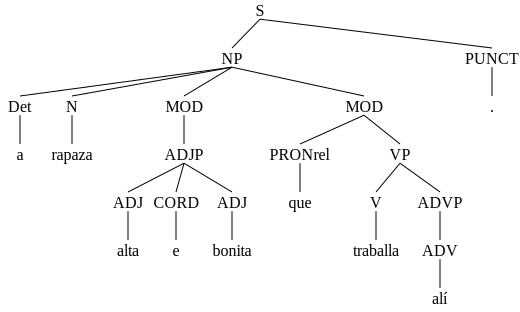

In [ ]:
sent10="a rapaza .".split()
sent11="a bonita rapaza de alí .".split()
sent12="a bonita e alta rapaza de alí .".split()
sent13="a bonita , rubia e alta rapaza de alí .".split()
sent14="a rapaza que traballa alí .".split()
sent15="a rapaza alta e bonita que traballa alí .".split()

chart_parser = nltk.ChartParser(grammar_galego)

for p10 in chart_parser.parse(sent10): print('sent10: ',p10)
for p11 in chart_parser.parse(sent11): print('sent11: ',p11)
for p12 in chart_parser.parse(sent12): print('sent12: ',p12)
for p13 in chart_parser.parse(sent13): print('sent13: ',p13)
for p14 in chart_parser.parse(sent14): print('sent14: ',p14)
for p15 in chart_parser.parse(sent15): print('sent15: ',p15)

display(p10)
display(p11)
display(p12)
display(p13)
display(p14)
display(p15)

Focusing only on the VP, the different complements can be simpler or more complex. For example:
- A rapaza ten unha pelota laranxa. (The girl has an orange ball)
- A rapaza ten unha pelota de cor laranxa. (The girl has an orange colored ball) -> For this I applied the rules: PP -> P NP; and NP -> N MOD

These sentences can also be negative. For that I add the category NEG for the negative particle 'no', and the rule: VP-> NEG V NP:
- A rapaza non ten unha pelota de cor laranxa. (The girl doesn't have an orange colored ball)

This grammar also accepts formations of two verbs in a row, in which one functions as an auxiliary. That is why I created the category of AUX to include these verbs.
- A rapaza estaba xogando. (The girl was playing) --> VP -> AUX V  

It can also be the case that these verbs are not strictly consecutive and that they have a complement in the middle, such as an adverb:
- A rapaza estaba tranquilamente xogando. (The girl was calmly playing)--> VP -> AUX ADVP V

sent16:  (S
  (NP (Det a) (N rapaza))
  (VP (V ten) (NP (Det unha) (N pelota) (MOD (ADJP (ADJ laranxa)))))
  (PUNCT .))
sent17:  (S
  (NP (Det a) (N rapaza))
  (VP
    (V ten)
    (NP
      (Det unha)
      (N pelota)
      (MOD (PP (P de) (NP (N cor) (MOD (ADJP (ADJ laranxa))))))))
  (PUNCT .))
sent18:  (S
  (NP (Det a) (N rapaza))
  (VP
    (NEG non)
    (V ten)
    (NP
      (Det unha)
      (N pelota)
      (MOD (PP (P de) (NP (N cor) (MOD (ADJP (ADJ laranxa))))))))
  (PUNCT .))
sent19:  (S (NP (Det a) (N rapaza)) (VP (AUX estaba) (V xogando)) (PUNCT .))
sent20:  (S
  (NP (Det a) (N rapaza))
  (VP (AUX estaba) (ADVP (ADV tranquilamente)) (V xogando))
  (PUNCT .))


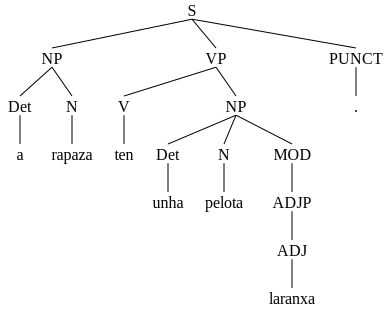

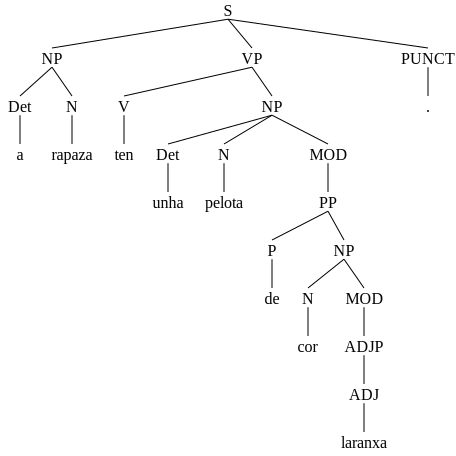

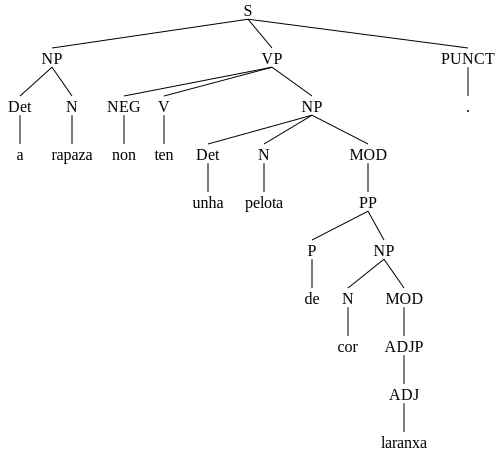

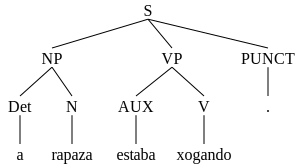

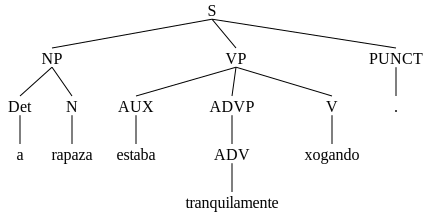

In [ ]:
sent16="a rapaza ten unha pelota laranxa .".split()
sent17="a rapaza ten unha pelota de cor laranxa .".split()
sent18="a rapaza non ten unha pelota de cor laranxa .".split()
sent19="a rapaza estaba xogando .".split()
sent20="a rapaza estaba tranquilamente xogando .".split()

chart_parser = nltk.ChartParser(grammar_galego)

for p16 in chart_parser.parse(sent16): print('sent16: ',p16)
for p17 in chart_parser.parse(sent17): print('sent17: ',p17)
for p18 in chart_parser.parse(sent18): print('sent18: ',p18)
for p19 in chart_parser.parse(sent19): print('sent19: ',p19)
for p20 in chart_parser.parse(sent20): print('sent20: ',p20)


display(p16)
display(p17)
display(p18)
display(p19)
display(p20)

Continuing with the theme of adjectives and adverbs, an adverb can act as a modifier of an adjective:
- A rapaza é moi importante. (The girl is very important)

The only thing that was necessary was to add in the VP the V ADJP rule that was not yet written.

Adjective chains can be created, through commas or coordination:
- A rapaza é moi alta e importante. (The girl is really important and tall)
- A rapaza é importante, alta e guapa. (The girl is important, tall and pretty)

These rules were previously set to work in N MODs, but I wanted to demonstrate that they also worked within VP.

sent21:  (S
  (NP (Det a) (N rapaza))
  (VP (V é) (ADJP (ADVP (ADV moi)) (ADJP (ADJ importante))))
  (PUNCT .))
sent22:  (S
  (NP (Det a) (N rapaza))
  (VP
    (V é)
    (ADJP
      (ADVP (ADV moi))
      (ADJP (ADJ alta) (CORD e) (ADJ importante))))
  (PUNCT .))
sent23:  (S
  (NP (Det a) (N rapaza))
  (VP
    (V é)
    (ADJP (ADJ importante) (PUNCT ,) (ADJ alta) (CORD e) (ADJ guapa)))
  (PUNCT .))


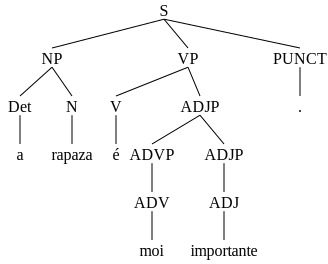

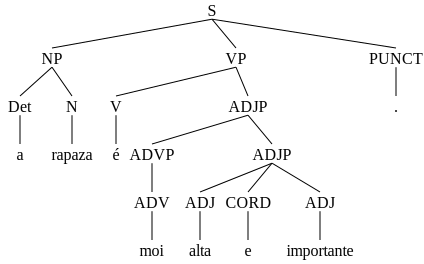

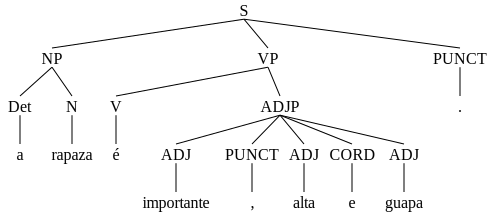

In [ ]:
sent21="a rapaza é moi importante .".split()
sent22="a rapaza é moi alta e importante .".split()
sent23="a rapaza é importante , alta e guapa .".split()

chart_parser = nltk.ChartParser(grammar_galego)

for p21 in chart_parser.parse(sent21): print('sent21: ',p21)
for p22 in chart_parser.parse(sent22): print('sent22: ',p22)
for p23 in chart_parser.parse(sent23): print('sent23: ',p23)

display(p21)
display(p22)
display(p23)

I have decided that my grammar should also include some composed sentences. First, sentences can be coordinated, through the use of 'and', 'that' and 'or':
- A rapaza xoga e o rapaz dorme. (the girl is playing and the boy is sleeping) --> I have created these two rules: S -> NP VP| S CORD S1 PUNCT. 

I created the NP VP because it was not set before, as it was only set with dot at the end.

It is also possible to form sentences through conjunctions such as 'but', 'because', 'although'... For this grammar I have only included 'but' and 'because' to serve as an example.
- A rapaza xoga, pero o rapaz dorme.(The girl is playing but the boy is sleeping)

Sentences with 'but' have a comma before them, so I made the following rule: S CONJ S1 PUNCT, without the need to add PUNCT because there was already the NP VP PUNCT rule that covers commas as well.
However, the compound sentence could also go without a comma:
- A rapaza chora porque o rapaz dorme. (The girl cries because the boy is sleeping)

sent24:  (S
  (S (NP (Det a) (N rapaza)) (VP (V xoga)))
  (CORD e)
  (S1 (NP (Det o) (N rapaz)) (VP (V dorme)))
  (PUNCT .))
sent25:  (S
  (S (NP (Det a) (N rapaza)) (VP (V xoga)) (PUNCT ,))
  (CONJ pero)
  (S1 (NP (Det o) (N rapaz)) (VP (V dorme)))
  (PUNCT .))
sent26:  (S
  (S (NP (Det a) (N rapaza)) (VP (V chora)))
  (CONJ porque)
  (S1 (NP (Det o) (N rapaz)) (VP (V dorme)))
  (PUNCT .))


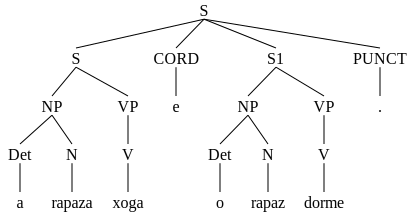

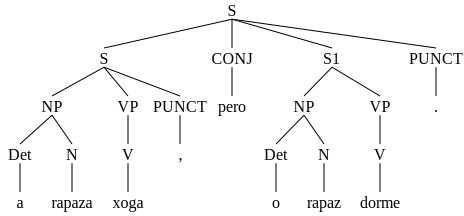

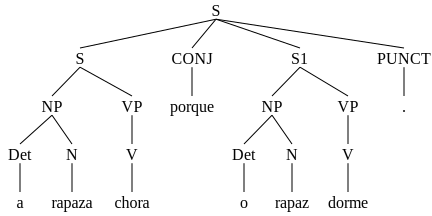

In [ ]:
sent24="a rapaza xoga e o rapaz dorme .".split()
sent25="a rapaza xoga , pero o rapaz dorme .".split()
sent26="a rapaza chora porque o rapaz dorme .".split()

chart_parser = nltk.ChartParser(grammar_galego)

for p24 in chart_parser.parse(sent24): print('sent24: ',p24)
for p25 in chart_parser.parse(sent25): print('sent25: ',p25)
for p26 in chart_parser.parse(sent26): print('sent26: ',p26)


display(p24)
display(p25)
display(p26)


I want my grammar to accept subordinate clauses as well. For that, I create a category for subordinate connectors: SUB. But first, subordinates can also be formed from only the conjunction 'that':
- Penso que a culpa é túa. (I think that's your fault)

Therefore, I create the rule: S -> S CONJ S1 PUNCT.

Subordinate clauses can be of many types: causal, distributive, explanatory, etc. In my grammar I only include the causative subordinate as an example.
- A rapaza xoga dado que fai bo tempo. (The girl is playing because the weather is nice)

For that I create the following rules:
S -> S SUB S1 PUNCT
SUB -> SUB CONJ (so that it takes the conector with the conjunction 'que' as a subordinate conector)
NP -> MOD N (I don't put NP because if I do so I create ambiguity, because it assumes that there would be more possibilities of analysis in the previous sentences. )


sent27:  (S
  (S (VP (V penso)))
  (CONJ que)
  (S1 (NP (Det a) (N culpa)) (VP (V é) (NP (PRON túa))))
  (PUNCT .))
sent28:  (S
  (S (NP (Det a) (N rapaza)) (VP (V xoga)))
  (SUB (SUB dado) (CONJ que))
  (S1 (VP (V fai) (NP (MOD (ADJP (ADJ bo))) (N tempo))))
  (PUNCT .))


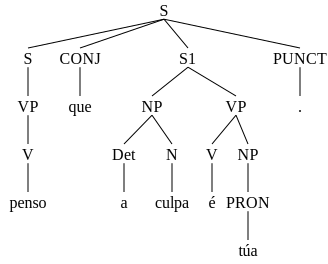

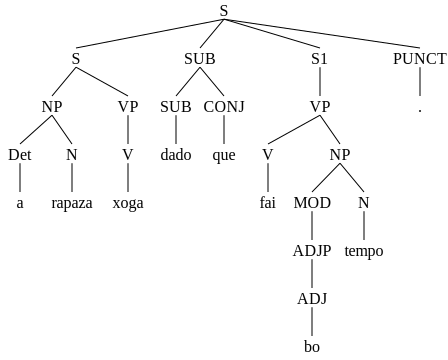

In [ ]:
sent27="penso que a culpa é túa .".split()
sent28="a rapaza xoga dado que fai bo tempo .".split()

chart_parser = nltk.ChartParser(grammar_galego)

for p27 in chart_parser.parse(sent27): print('sent27: ',p27)
for p28 in chart_parser.parse(sent28): print('sent28: ',p28)

display(p27)
display(p28)

For these last sentences I have tried to put in sentences that would fall under my CFG and try to fix some missing rules that I wanted my grammar to include:
- A rapaza e o rapaz xogan. (The girl and the boy are playing)
- Cristina e Manuel xogan. (Cristina and Manuel are playing) --> This sentence is not possible to realize in my CFG because if I create the rule NP -> Nprop CORD Nprop I generate ambiguity in other sentences like sentence 7. So my CFG is not very admissible with proper nouns.
- A bonita pelota é de cor laranxa.(The nice ball is orange colored.) -> With this sentence I realized that the rule covering the possibility of Det MOD N formation in the NP and V PP formation in the VP had yet to be added.
- Ela non estaba xogando (She was not playing) -> The possibility of two verbs being in a negative sentence was missing: VP -> Neg AUX V.
- O libro de Carlos é moi bonito (Carlos' book is really nice)
- O libro de Carlos é moi bonito e a pelota de Manuel é laranxa. (Carlos' book is really nice and Manuel's ball is orange).

These last two sentences were accepted without problem by my CFG.

- Cristina é unha rapaza, pero Carlos é un rapaz (Cristina is a girl, but Carlos is a boy) --> This sentence is not accepted by my CFG, because if I put that Nprop can form an NP it creates ambiguity by creating several possibilities in previous sentences. This sentence could be included in the CFG if it were as follows: ela é unha rapaza, pero el é un rapaz. (she's a girl, but he's a boy)

I would also like my grammar to include sentences that can begin with adverbs such as:
- Sinceramente, a rapaza é moi alta .(Honestly, the girl is really tall) --> ADVP PUNCT S PUNCT. I include punctuation because these types of sentences are usually separated by a comma.

sent29:  (S
  (NP (NP (Det a) (N rapaza)) (CORD e) (NP (Det o) (N rapaz)))
  (VP (V xogan))
  (PUNCT .))
sent30:  (S
  (NP (Det a) (MOD (ADJP (ADJ bonita))) (N pelota))
  (VP (V é) (PP (P de) (NP (N cor) (MOD (ADJP (ADJ laranxa))))))
  (PUNCT .))
sent31:  (S (NP (PRON ela)) (VP (NEG non) (AUX estaba) (V xogando)) (PUNCT .))
sent32:  (S
  (NP (Det o) (N libro) (MOD (PP (P de) (Nprop Carlos))))
  (VP (V é) (ADJP (ADVP (ADV moi)) (ADJP (ADJ bonito))))
  (PUNCT .))
sent33:  (S
  (S
    (NP (Det o) (N libro) (MOD (PP (P de) (Nprop Carlos))))
    (VP (V é) (ADJP (ADVP (ADV moi)) (ADJP (ADJ bonito)))))
  (CORD e)
  (S1
    (NP (Det a) (N pelota) (MOD (PP (P de) (Nprop Manuel))))
    (VP (V é) (ADJP (ADJ laranxa))))
  (PUNCT .))
sent34:  (S
  (S (NP (PRON ela)) (VP (V é) (NP (Det unha) (N rapaza))) (PUNCT ,))
  (CONJ pero)
  (S1 (NP (PRON el)) (VP (V é) (NP (Det un) (N rapaz))))
  (PUNCT .))
sent35:  (S
  (ADVP (ADV sinceramente))
  (PUNCT ,)
  (S
    (NP (Det a) (N rapaza))
    (VP (V é) (ADJ

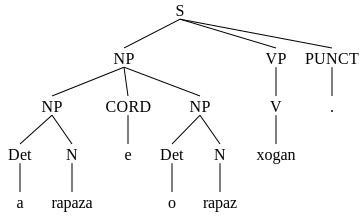

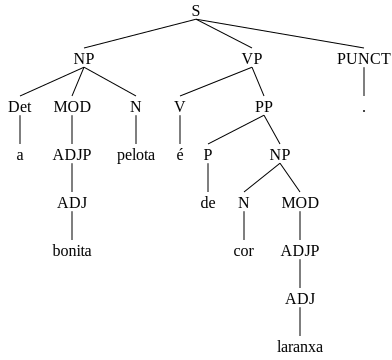

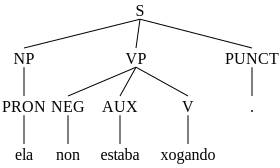

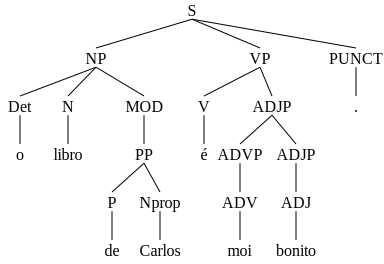

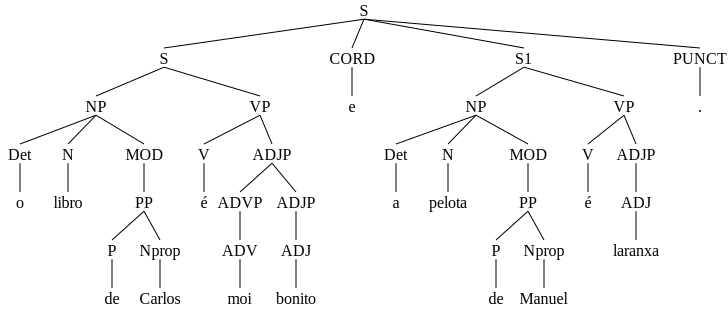

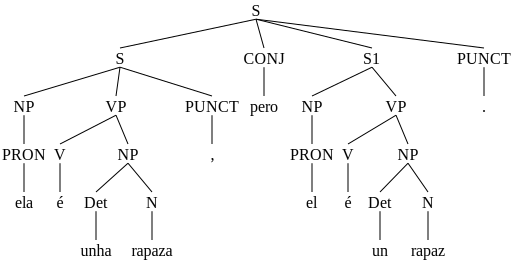

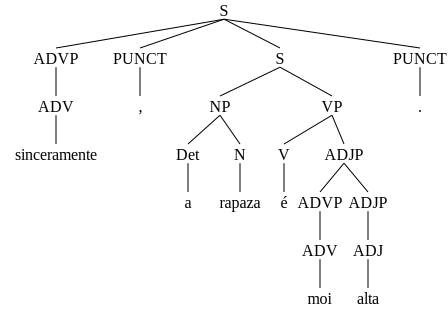

In [ ]:
sent29="a rapaza e o rapaz xogan .".split()
sent30="a bonita pelota é de cor laranxa .".split()
sent31="ela non estaba xogando .".split()
sent32="o libro de Carlos é moi bonito .".split()
sent33="o libro de Carlos é moi bonito e a pelota de Manuel é laranxa .".split()
sent34="ela é unha rapaza , pero el é un rapaz .".split()
sent35="sinceramente , a rapaza é moi alta .".split()

chart_parser = nltk.ChartParser(grammar_galego)

for p29 in chart_parser.parse(sent29): print('sent29: ',p29)
for p30 in chart_parser.parse(sent30): print('sent30: ',p30)
for p31 in chart_parser.parse(sent31): print('sent31: ',p31)
for p32 in chart_parser.parse(sent32): print('sent32: ',p32)
for p33 in chart_parser.parse(sent33): print('sent33: ',p33)
for p34 in chart_parser.parse(sent34): print('sent34: ',p34)
for p35 in chart_parser.parse(sent35): print('sent35: ',p35)


display(p29)
display(p30)
display(p31)
display(p32)
display(p33)
display(p34)
display(p35)

Finally, I tried to use the code below to generate sentences through my CFG, but the sentences it creates don't make much sense. They are well done formations in the syntactic sense, but they lack semantic meaning. This is because there are also no indicators of who is the subject, the direct complement, etc. Nor whether it is a masculine, feminine or plural object.

In [ ]:
from nltk.parse.generate import generate

for sentence in generate(grammar_galego, n=100, depth=5):
     print(' '.join(sentence))

a rapaza escribe .
a rapaza escribe ,
a rapaza escribe ?
a rapaza escriben .
a rapaza escriben ,
a rapaza escriben ?
a rapaza traballa .
a rapaza traballa ,
a rapaza traballa ?
a rapaza ten .
a rapaza ten ,
a rapaza ten ?
a rapaza xogando .
a rapaza xogando ,
a rapaza xogando ?
a rapaza pensaba .
a rapaza pensaba ,
a rapaza pensaba ?
a rapaza é .
a rapaza é ,
a rapaza é ?
a rapaza xoga .
a rapaza xoga ,
a rapaza xoga ?
a rapaza dorme .
a rapaza dorme ,
a rapaza dorme ?
a rapaza penso .
a rapaza penso ,
a rapaza penso ?
a rapaza chora .
a rapaza chora ,
a rapaza chora ?
a rapaza fai .
a rapaza fai ,
a rapaza fai ?
a rapaza xogan .
a rapaza xogan ,
a rapaza xogan ?
a rapaza escribe a rapaza .
a rapaza escribe a rapaza ,
a rapaza escribe a rapaza ?
a rapaza escribe a libro .
a rapaza escribe a libro ,
a rapaza escribe a libro ?
a rapaza escribe a rapaz .
a rapaza escribe a rapaz ,
a rapaza escribe a rapaz ?
a rapaza escribe a pelota .
a rapaza escribe a pelota ,
a rapaza escribe a pelota 